# **Setup**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')
import seaborn as sns
import os

import yfinance as yf
import datetime as dt

# **Data Import**

## **Stock Data**

In [3]:
Stock_Name = 'Apple Inc.'
Stock_Symbol = 'AAPL'
Date_Start = '2019-01-01'
Date_End = dt.datetime.now().strftime('%Y-%m-%d')

Stock_Data = yf.download(tickers='AAPL',start=Date_Start,end=Date_End)

print(Stock_Data.shape)
Stock_Data.head(10)

c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

(1293, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845032,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075394,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530045,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450970,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126774,164101200
2019-01-09,37.822498,38.632500,37.407501,38.327499,36.740269,180396400
2019-01-10,38.125000,38.492500,37.715000,38.450001,36.857697,143122800
2019-01-11,38.220001,38.424999,37.877499,38.072498,36.495831,108092800
2019-01-14,37.712502,37.817501,37.305000,37.500000,35.947037,129756800


In [4]:
Stock_Data['Returns'] = Stock_Data['Adj Close'].pct_change()
Stock_Data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845032,148158800,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075394,365248800,-0.099607
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530045,234428400,0.042689
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450970,219111200,-0.002226
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126774,164101200,0.019063


## **Market Data**

In [5]:
Market_Symbol = '^GSPC'
Market_Data = yf.download(tickers=Market_Symbol,start=Date_Start,end=Date_End)

print(Market_Data.shape)
Market_Data.head()

c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

(1293, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000


## **Combined Data**

In [6]:
Combined_Data = Stock_Data.join(Market_Data['Adj Close'],on=Stock_Data.index,
                                rsuffix='_Market')

print(Combined_Data.shape)
Combined_Data.head(10)

(1293, 9)


,key_0,Open,High,Low,Close,Adj Close,Volume,Returns,Adj Close_Market
Date,,,,,,,,,
2019-01-02,2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845032,148158800,NaN,2510.030029
2019-01-03,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075394,365248800,-0.099607,2447.889893
2019-01-04,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530045,234428400,0.042689,2531.939941
2019-01-07,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450970,219111200,-0.002226,2549.689941
2019-01-08,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126774,164101200,0.019063,2574.409912
2019-01-09,2019-01-09,37.822498,38.632500,37.407501,38.327499,36.740269,180396400,0.016982,2584.959961
2019-01-10,2019-01-10,38.125000,38.492500,37.715000,38.450001,36.857697,143122800,0.003196,2596.639893
2019-01-11,2019-01-11,38.220001,38.424999,37.877499,38.072498,36.495831,108092800,-0.009818,2596.260010
2019-01-14,2019-01-14,37.712502,37.817501,37.305000,37.500000,35.947037,129756800,-0.015037,2582.610107


In [7]:
Combined_Data.drop('key_0', axis=1, inplace=True)
Combined_Data.head(10)

,Open,High,Low,Close,Adj Close,Volume,Returns,Adj Close_Market
Date,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845032,148158800,NaN,2510.030029
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075394,365248800,-0.099607,2447.889893
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530045,234428400,0.042689,2531.939941
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450970,219111200,-0.002226,2549.689941
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126774,164101200,0.019063,2574.409912
2019-01-09,37.822498,38.632500,37.407501,38.327499,36.740269,180396400,0.016982,2584.959961
2019-01-10,38.125000,38.492500,37.715000,38.450001,36.857697,143122800,0.003196,2596.639893
2019-01-11,38.220001,38.424999,37.877499,38.072498,36.495831,108092800,-0.009818,2596.260010
2019-01-14,37.712502,37.817501,37.305000,37.500000,35.947037,129756800,-0.015037,2582.610107


In [8]:
Combined_Data['Returns_Market'] =  Combined_Data['Adj Close_Market'].pct_change()

Combined_Data.head(10)

,Open,High,Low,Close,Adj Close,Volume,Returns,Adj Close_Market,Returns_Market
Date,,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845032,148158800,NaN,2510.030029,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075394,365248800,-0.099607,2447.889893,-0.024757
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530045,234428400,0.042689,2531.939941,0.034336
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450970,219111200,-0.002226,2549.689941,0.007010
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126774,164101200,0.019063,2574.409912,0.009695
2019-01-09,37.822498,38.632500,37.407501,38.327499,36.740269,180396400,0.016982,2584.959961,0.004098
2019-01-10,38.125000,38.492500,37.715000,38.450001,36.857697,143122800,0.003196,2596.639893,0.004518
2019-01-11,38.220001,38.424999,37.877499,38.072498,36.495831,108092800,-0.009818,2596.260010,-0.000146
2019-01-14,37.712502,37.817501,37.305000,37.500000,35.947037,129756800,-0.015037,2582.610107,-0.005258


# **Get Financial Metrics**

## **Volatility**

In [9]:
Stock_Volatility = Stock_Data['Returns'].std()
Stock_Volatility

0.020137987477925633

## **Covariance Matrix**

In [10]:
Stock_Cov_Matrix = Combined_Data.cov()
Stock_Cov_Matrix

,Open,High,Low,Close,Adj Close,Volume,Returns,Adj Close_Market,Returns_Market
Open,2.212858e+03,2.231272e+03,2.192536e+03,2.211738e+03,2.224456e+03,-1.181596e+09,-0.046310,2.884616e+04,-0.012544
High,2.231272e+03,2.251389e+03,2.211340e+03,2.231908e+03,2.244658e+03,-1.173460e+09,-0.035269,2.907271e+04,-0.008587
Low,2.192536e+03,2.211340e+03,2.174154e+03,2.193331e+03,2.206043e+03,-1.193390e+09,-0.032675,2.864747e+04,-0.006467
Close,2.211738e+03,2.231908e+03,2.193331e+03,2.214401e+03,2.227137e+03,-1.185207e+09,-0.018385,2.888911e+04,0.001169
Adj Close,2.224456e+03,2.244658e+03,2.206043e+03,2.227137e+03,2.240268e+03,-1.198657e+09,-0.019075,2.902290e+04,0.001011
Volume,-1.181596e+09,-1.173460e+09,-1.193390e+09,-1.185207e+09,-1.198657e+09,2.751848e+15,-30367.188291,-1.847332e+10,-68454.837312
Returns,-4.631023e-02,-3.526875e-02,-3.267536e-02,-1.838509e-02,-1.907452e-02,-3.036719e+04,0.000406,-1.719090e-01,0.000215
Adj Close_Market,2.884616e+04,2.907271e+04,2.864747e+04,2.888911e+04,2.902290e+04,-1.847332e+10,-0.171909,4.244755e+05,0.158987
Returns_Market,-1.254394e-02,-8.586862e-03,-6.467301e-03,1.169031e-03,1.010801e-03,-6.845484e+04,0.000215,1.589873e-01,0.000177


In [11]:
Stock_Cov_Matrix.values[0,1]

2231.2716460525894

In [12]:
Stock_Cov_Matrix.values[1,1]

2251.3893003044095

## **Beta Ratio**

In [13]:
Stock_Beta = Stock_Cov_Matrix.values[0,1] / Stock_Cov_Matrix.values[1,1]
Stock_Beta

0.9910643378072819

## **Sharpe Ratio**

In [14]:
Stock_Sharpe = Combined_Data['Returns'].mean() / Stock_Volatility
Stock_Sharpe

0.07053375598671278

## **Weekly Returns**

In [15]:
Combined_Data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Adj Close_Market,Returns_Market
Date,,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845032,148158800,NaN,2510.030029,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075394,365248800,-0.099607,2447.889893,-0.024757
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530045,234428400,0.042689,2531.939941,0.034336
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450970,219111200,-0.002226,2549.689941,0.007010
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126774,164101200,0.019063,2574.409912,0.009695


In [16]:
Combined_Data['Weekly_Returns'] = Combined_Data['Returns'].rolling(7).mean()

Combined_Data.loc[:,['Adj Close','Returns','Weekly_Returns']].head(10)

,Adj Close,Returns,Weekly_Returns
Date,,,
2019-01-02,37.845032,NaN,NaN
2019-01-03,34.075394,-0.099607,NaN
2019-01-04,35.530045,0.042689,NaN
2019-01-07,35.450970,-0.002226,NaN
2019-01-08,36.126774,0.019063,NaN
2019-01-09,36.740269,0.016982,NaN
2019-01-10,36.857697,0.003196,NaN
2019-01-11,36.495831,-0.009818,-0.004246
2019-01-14,35.947037,-0.015037,0.007836


## **Monthly Returns**

In [17]:
Combined_Data['Monthly_Returns'] = Combined_Data['Returns'].rolling(30).mean()

Combined_Data.loc[:,['Adj Close','Returns','Weekly_Returns','Monthly_Returns']].head(10)

,Adj Close,Returns,Weekly_Returns,Monthly_Returns
Date,,,,
2019-01-02,37.845032,NaN,NaN,NaN
2019-01-03,34.075394,-0.099607,NaN,NaN
2019-01-04,35.530045,0.042689,NaN,NaN
2019-01-07,35.450970,-0.002226,NaN,NaN
2019-01-08,36.126774,0.019063,NaN,NaN
2019-01-09,36.740269,0.016982,NaN,NaN
2019-01-10,36.857697,0.003196,NaN,NaN
2019-01-11,36.495831,-0.009818,-0.004246,NaN
2019-01-14,35.947037,-0.015037,0.007836,NaN


## **Cumulative Returns**

* Daily
* Weekly
* Monthly

In [18]:
Combined_Data['CReturn_Daily'] = (1 + Combined_Data['Returns']).cumprod() - 1
Combined_Data['CReturn_Weekly'] = (1 + Combined_Data['Weekly_Returns']).cumprod() - 1
Combined_Data['CReturn_Monthly'] = (1 + Combined_Data['Monthly_Returns']).cumprod() - 1

Combined_Data.loc[:,['Adj Close','Returns','Weekly_Returns','Monthly_Returns','CReturn_Daily','CReturn_Weekly','CReturn_Monthly']]

,Adj Close,Returns,Weekly_Returns,Monthly_Returns,CReturn_Daily,CReturn_Weekly,CReturn_Monthly
Date,,,,,,,
2019-01-02,37.845032,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,34.075394,-0.099607,NaN,NaN,-0.099607,NaN,NaN
2019-01-04,35.530045,0.042689,NaN,NaN,-0.061170,NaN,NaN
2019-01-07,35.450970,-0.002226,NaN,NaN,-0.063260,NaN,NaN
2019-01-08,36.126774,0.019063,NaN,NaN,-0.045402,NaN,NaN
...,...,...,...,...,...,...,...
2024-02-14,184.149994,-0.004810,-0.002505,-0.000159,3.865896,5.517320,5.287045
2024-02-15,183.860001,-0.001575,-0.003963,0.000038,3.858233,5.491493,5.287285
2024-02-16,182.309998,-0.008430,-0.005250,0.000181,3.817277,5.457411,5.288420


## **VaR**

In [19]:
Stock_VaR = Combined_Data['Returns'].dropna().quantile(0.05)
print(Stock_VaR)

-0.030564332031767793


## **Alpha**

In [21]:
Combined_Data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Adj Close_Market', 'Returns_Market', 'Weekly_Returns',
       'Monthly_Returns', 'CReturn_Daily', 'CReturn_Weekly',
       'CReturn_Monthly'],
      dtype='object')

In [36]:
# Calculate Stock Alpha
Stock_Alpha_Model = np.polyfit(Combined_Data['Returns_Market'].dropna(),Combined_Data['Returns'].dropna(),1)
print(Stock_Alpha_Model)

# Calculate Stock Alpha
Stock_Alpha = Stock_Alpha_Model[1]
print(Stock_Alpha)

[1.21474946e+00 6.67802593e-04]
0.0006678025932862048


## **Trenor Ratio**

In [41]:
RF_Rate = 0.02 # Risk Free Rate Of Returns

Stock_Treynor_Ratio = (Combined_Data['Returns'].mean() - RF_Rate) / Stock_Beta
print(Stock_Treynor_Ratio)

-0.01874710994674235


## **Max Drawdown**

In [44]:
Stock_CReturns = (1+ Combined_Data['Returns']).cumprod()
Stock_Peak = Stock_CReturns.cummax()

Stock_Drawdown = (Stock_CReturns - Stock_Peak) / Stock_Peak
Stock_Drawdown_Max = abs(Stock_Drawdown.min())

# **Data Visualization**

## **Plot Returns**

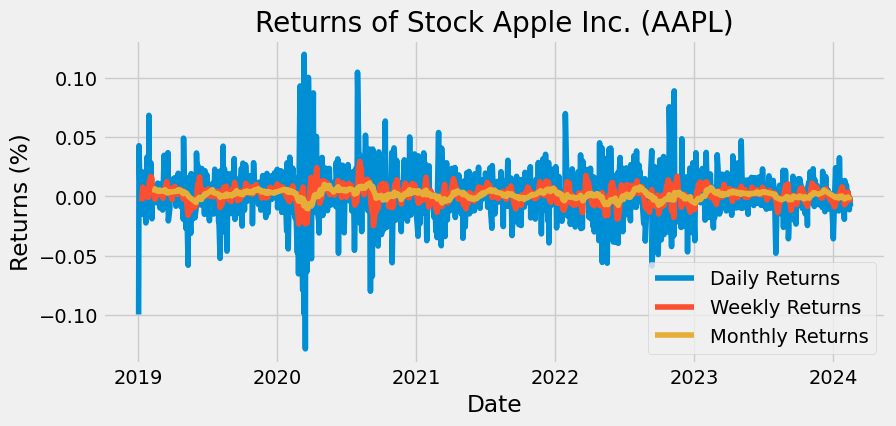

In [58]:
plt.figure(figsize=(9,4))

plt.plot(Combined_Data.index,Combined_Data['Returns'],label='Daily Returns')
plt.plot(Combined_Data.index,Combined_Data['Weekly_Returns'],label='Weekly Returns')
plt.plot(Combined_Data.index,Combined_Data['Monthly_Returns'],label='Monthly Returns')

plt.title('Returns of Stock {} ({})'.format(Stock_Name,Stock_Symbol))
plt.legend(loc='best')
plt.ylabel('Returns (%)')
plt.xlabel('Date')
plt.show()

## **Cumulative Returns**

In [63]:
Combined_Data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Adj Close_Market', 'Returns_Market', 'Weekly_Returns',
       'Monthly_Returns', 'CReturn_Daily', 'CReturn_Weekly',
       'CReturn_Monthly'],
      dtype='object')

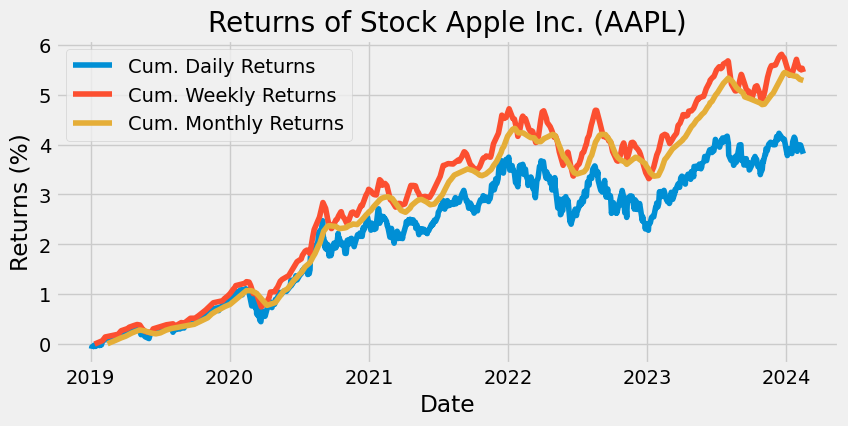

In [64]:
plt.figure(figsize=(9,4))

plt.plot(Combined_Data.index,Combined_Data['CReturn_Daily'],label='Cum. Daily Returns')
plt.plot(Combined_Data.index,Combined_Data['CReturn_Weekly'],label='Cum. Weekly Returns')
plt.plot(Combined_Data.index,Combined_Data['CReturn_Monthly'],label='Cum. Monthly Returns')

plt.title('Returns of Stock {} ({})'.format(Stock_Name,Stock_Symbol))
plt.legend(loc='best')
plt.ylabel('Returns (%)')
plt.xlabel('Date')
plt.show()

# **Stock Analysis Summary**

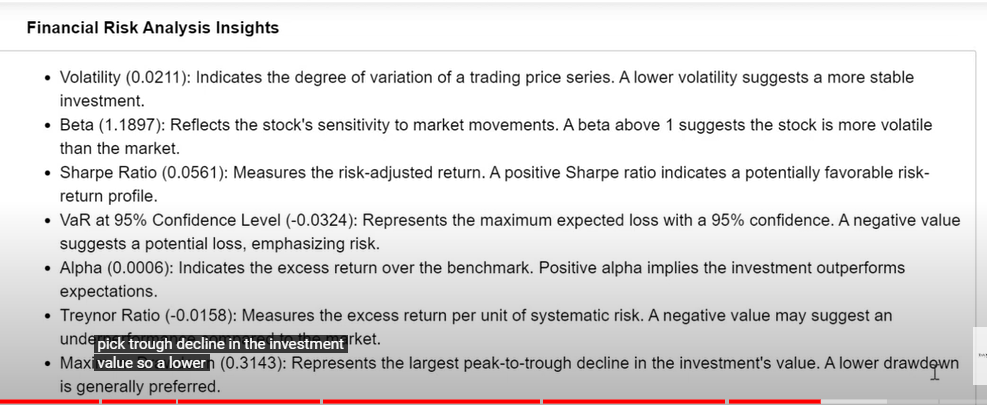

In [46]:
print('Stock Name: ', Stock_Name)
print('Stock Symbol: ', Stock_Symbol)
print('Stock Volatility: ',Stock_Volatility)
print('Stock Beta: ',Stock_Beta)
print('Stock Sharpe Ratio: ',Stock_Sharpe)
print('VaR At 95% Confidence: ',Stock_VaR)
print('Stock Alpha: ',Stock_Alpha)
print('Stock Treynor Ratio: ',Stock_Treynor_Ratio)
print('Stock Max Drawdown: ',Stock_Drawdown_Max)

Stock Name:  Apple Inc.
Stock Symbol:  AAPL
Stock Volatility:  0.020137987477925633
Stock Beta:  0.9910643378072819
Stock Sharpe Ratio:  0.07053375598671278
VaR At 95% Confidence:  -0.030564332031767793
Stock Alpha:  0.0006678025932862048
Stock Treynor Ratio:  -0.01874710994674235
Stock Max Drawdown:  0.3142726756841584


## **Advisory**